In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from casadi import *
import scipy.interpolate
import math

In [4]:
from casadi import *
from numpy import *
%matplotlib inline
#import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
class Iteration_Callback(Callback):
    def __init__(self, name, nx, ng, opts={}):
        Callback.__init__(self)

        self.nx = nx
        self.ng = ng

        self.x_sols = []
        self.f_sols = []
        self.g_sols = []
        self.lam_x_sols = []
        self.lam_g_sols = []
        self.lam_p_sols = []
        '''
        #for plotting the graph in realtime
        self.fig= plt.figure()
        self.ax1= self.fig.add_subplot(1,2,1)
        self.ax2= self.fig.add_subplot(2,2,1)
        self.fig.show()
        '''
        # Initialize internal objects
        self.construct(name, opts)

    def get_n_in(self): return nlpsol_n_out()
    def get_n_out(self): return 1
    def get_name_in(self, i): return nlpsol_out(i)
    def get_name_out(self, i): return "ret"

    def get_sparsity_in(self, i):
        n = nlpsol_out(i)
        if n == 'f':
            return Sparsity.scalar()
        elif n in ('x', 'lam_x'):
            return Sparsity.dense(self.nx)
        elif n in ('g', 'lam_g'):
            return Sparsity.dense(self.ng)
        else:
            return Sparsity(0, 0)

    def eval(self, arg):
        
        darg = {}
        for (i, s) in enumerate(nlpsol_out()): darg[s] = arg[i]
        x_sol = [float(elem) for elem in darg['x'].full()]
        
        self.x_sols.append(x_sol)
        self.f_sols.append(darg['f'].full()[0][0])
        self.g_sols.append(darg['g'].full()[0][0])
        self.lam_x_sols.append(darg['lam_x'].full())
        self.lam_g_sols.append(darg['lam_g'].full())
        self.lam_p_sols.append(darg['lam_p'].full())
        #print("solution",self.f_sols)
        '''
        #for plotting the graph in realtime
        self.ax1.plot(self.x_sols)
        self.ax2.plot(self.f_sols)
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()
        plt.show()
        '''
        plt.plot(self.f_sols,color='C0')
        #plt.plot(self.g_sols,color='C0')
        #print(self.g_sols)
        return[0]

In [119]:
from casadi import *
import math
dest = [3,2]
way = [2,1]
obs = [6,5.7]
#t=MX.sym('t')
#v=MX.sym('v')
dt=30
dt1=int(dt/2)
print(dt1)
rob_rad=0.1
obs_rad=0.1
ang=SX.sym("ang",dt)
v=SX.sym("v")
t1=SX.sym("t1")
t2=SX.sym("t2")
print(ang)
func,func1,func2=0,0,0
g=0
theta=0
fuel_cost=0
coff=0.00045
for i in range(0,dt1):
    func1=func1+v*cos(theta)*t1
    func2=func2+v*sin(theta)*t1
    theta=theta + (v / 1.2)*tan(ang[i])*t1
    fuel_cost+=(-0.0177*v**2+1.48*v+3.39)
    if i==dt1-1:
            func_con=(sqrt(coff+(func1-way[0])**2+(func2-way[1])**2))
for i in range(dt1,dt):
        func1=func1+v*cos(theta)*t2
        func2=func2+v*sin(theta)*t2
        theta=theta + (v / 1.2)*tan(ang[i])*t2
        fuel_cost+=(-0.0177*v**2+1.48*v+3.39)
        if i==dt-1:
            func=func_con+(sqrt(coff+(func1-dest[0])**2+(func2-dest[1])**2))+fuel_cost
            #g=sqrt(coff+(func1-obs[0])**2+(func2-obs[1])**2)-(rob_rad+obs_rad)
            #g=func_con
            print(func)     
            print("g",g)
nlp= {}
nlp['x']=vertcat(ang,v,t1,t2)
#nlp['x']=vertcat(v,t) 
nlp['f']=func
nlp['g']=g
mycallback = Iteration_Callback('mycallback',(dt+3), 1)
opts = {}
opts['iteration_callback'] = mycallback
opts['ipopt.tol'] = 1e-5
opts["ipopt.max_iter"]=50000
#create solver instance
F = nlpsol('F','ipopt',nlp,opts);
#F=qpsol('F','qpoases',nlp);
print(F)

15
[ang_0, ang_1, ang_2, ang_3, ang_4, ang_5, ang_6, ang_7, ang_8, ang_9, ang_10, ang_11, ang_12, ang_13, ang_14, ang_15, ang_16, ang_17, ang_18, ang_19, ang_20, ang_21, ang_22, ang_23, ang_24, ang_25, ang_26, ang_27, ang_28, ang_29]
@1=0.00045, @2=1.2, @3=(((v/@2)*tan(ang_0))*t1), @4=(@3+(((v/@2)*tan(ang_1))*t1)), @5=(@4+(((v/@2)*tan(ang_2))*t1)), @6=(@5+(((v/@2)*tan(ang_3))*t1)), @7=(@6+(((v/@2)*tan(ang_4))*t1)), @8=(@7+(((v/@2)*tan(ang_5))*t1)), @9=(@8+(((v/@2)*tan(ang_6))*t1)), @10=(@9+(((v/@2)*tan(ang_7))*t1)), @11=(@10+(((v/@2)*tan(ang_8))*t1)), @12=(@11+(((v/@2)*tan(ang_9))*t1)), @13=(@12+(((v/@2)*tan(ang_10))*t1)), @14=(@13+(((v/@2)*tan(ang_11))*t1)), @15=(@14+(((v/@2)*tan(ang_12))*t1)), @16=(@15+(((v/@2)*tan(ang_13))*t1)), @17=(((((((((((((((v*t1)+((v*cos(@3))*t1))+((v*cos(@4))*t1))+((v*cos(@5))*t1))+((v*cos(@6))*t1))+((v*cos(@7))*t1))+((v*cos(@8))*t1))+((v*cos(@9))*t1))+((v*cos(@10))*t1))+((v*cos(@11))*t1))+((v*cos(@12))*t1))+((v*cos(@13))*t1))+((v*cos(@14))*t1))+((v*cos(@15)

[0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.2, 0.2, 0.2]
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      528

Total number of variables............................:       33
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       33
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:

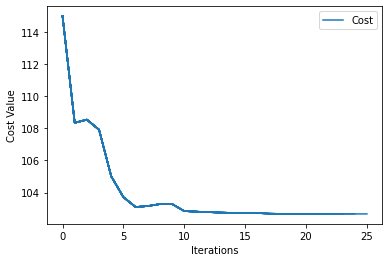

In [120]:
#solver=F(x0=[0.1,2],lbx=lbx,ubx=ubx)
x0=[]
lbx=[]
ubx=[]
# the loop for setting angle
for i in range(0,dt):
    x0.append(0.002)
    lbx.append(0.002)
    #ubx.append(0.5)  #previous value
    ubx.append(0.45)
# the loop for setting velocity  
for i in range(0,1):
    x0.append(0.2)
    lbx.append(0.02)
    ubx.append(2)
# the loop for setting sample time 
for i in range(0,1):
    x0.append(0.2)
    lbx.append(0.02)
    #ubx.append(2) #previous value
    ubx.append(200)
for i in range(0,1):
    x0.append(0.2)
    lbx.append(0.02)
    #ubx.append(2) #previous value
    ubx.append(200)

print(x0)
solver=F(x0=x0,lbx=lbx,ubx=ubx)
out=[]
out.append(solver["x"])
print("solved output",out)
print("solved function output",solver["f"])
plt.legend(["Cost"])
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

2.04741 0.955973
2.99851 2.00135


Text(0, 0.5, 'Y Coordinate')

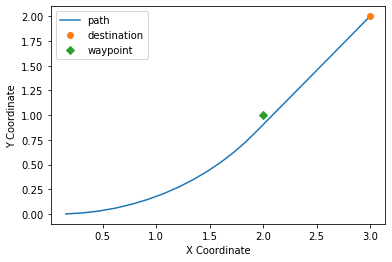

In [121]:
import matplotlib.pyplot as plt
import math
ang=[]
v=[]
t1=[]
t2=[]
for i in range(0,dt):
    ang.append(out[0][i])
v.append(out[0][dt])
t1.append(out[0][dt+1])
t2.append(out[0][dt+2])
xc,yc=[],[]
theta=0.0
x1,x2=0,0
for i in range(0,dt1):
    x1=x1+v[0]*math.cos(theta)*t1[0]
    x2=x2+v[0]*math.sin(theta)*t1[0]
    theta = theta + (v[0] / 1.2) * math.tan(ang[i])*t1[0]
    xc.append(x1)
    yc.append(x2)
print(x1,x2)
for i in range(dt1,dt):
    x1=x1+v[0]*math.cos(theta)*t2[0]
    x2=x2+v[0]*math.sin(theta)*t2[0]
    theta = theta + (v[0] / 1.2) * math.tan(ang[i])*t2[0]
    xc.append(x1)
    yc.append(x2)
print(x1,x2)
plt.plot(xc,yc,dest[0],dest[1],"o",way[0],way[1],"D")#,obs[0],obs[1],"s")
plt.legend(["path", "destination","waypoint","obstacle"])
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

In [299]:
x_opt = solver['f']
print(x_opt)

4.62031


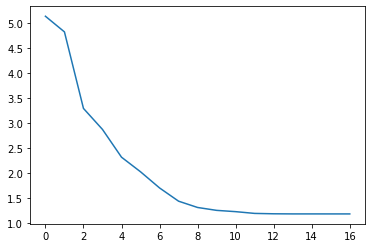

In [80]:
cost1=[]
cost1=[5.1407028e+000,4.8279191e+000 ,
    3.2988949e+000, 
    2.8788262e+000 ,
    2.3243103e+000 ,
    2.0325987e+000 ,
    1.7099310e+000 ,
   1.4452566e+000 ,
    1.3194831e+000 ,
    1.2617696e+000 ,
  1.2360491e+000, 1.2009504e+000, 
   1.1934256e+000 ,
   1.1910525e+000 ,
   1.1910547e+000 ,
   1.1908748e+000 ,
   1.1908742e+000 ]
plt.plot(cost1)

In [629]:
xv=0
x=[]
v=0.4
a=0.3
out1=(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))
for i in range(0,10):
    xv=xv+v*cos(a)
    x.append(xv)
print(xv)
print(out1)

3.821345956502425
3.821345956502425


In [27]:
x = SX.sym('x'); y = SX.sym('y'); z = SX.sym('z')
nlp = {'x':vertcat(x,y,z), 'f':x**2+100*z**2, 'g':z+(1-x)**2-y}
S = nlpsol('S', 'ipopt', nlp)
print(S)

S:(x0[3],p[],lbx[3],ubx[3],lbg,ubg,lam_x0[3],lam_g0)->(x[3],f,g,lam_x[3],lam_g,lam_p[]) IpoptInterface


In [28]:
r = S(x0=[2.5,3.0,0.75],lbg=0, ubg=0)
x_opt = r['x']
print('x_opt: ', x_opt)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 6